In [2]:
import glob
import os
import xarray as xr
import numpy as np

In [3]:
"""Subset and merge GLEAM v4.1a soil moisture data from 2000-2023"""

'Subset and merge GLEAM v4.1a soil moisture data from 2000-2023'

In [46]:
files=glob.glob(r"D:/VUB/_data/gleam_v41/ssm/*.nc")

In [48]:
files=files[0:]
subset_=[]
for file in files:
    ds=xr.open_dataset(file, engine='netcdf4')
    #subset to study area  
    ds_subset=ds.sel(lat=slice(5.5, -0.5), lon=slice(33.8, 39.8))
    subset_.append(ds_subset)

ds=xr.merge(subset_)

In [54]:
ds.to_netcdf(r"D:\VUB\_data\nc_files\gleam_v41a_ssm_2000_2023.nc")

In [51]:
ds_ts=ds['SMs'].sel(lon=36.65,lat=1, method='nearest')
ds_df=ds_ts.to_dataframe().drop(columns=['lat','lon'])

<Axes: xlabel='time'>

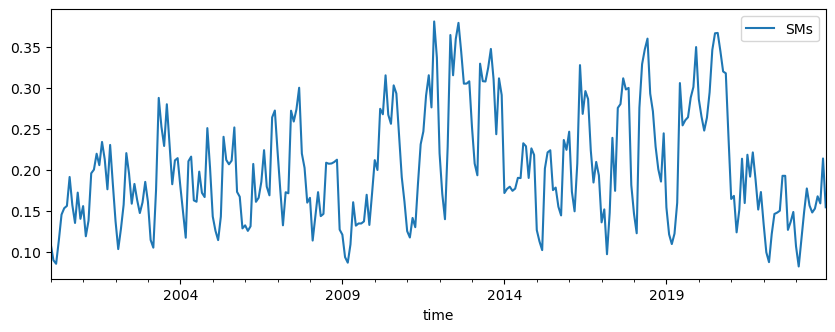

In [50]:
ds_df.plot(figsize=(10,3.5))

In [45]:
ds

<xarray.Dataset>
Dimensions:  (time: 288, lon: 60, lat: 60)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2023-12-31
  * lon      (lon) float64 33.85 33.95 34.05 34.15 ... 39.45 39.55 39.65 39.75
  * lat      (lat) float64 5.45 5.35 5.25 5.15 5.05 ... -0.15 -0.25 -0.35 -0.45
Data variables:
    SMrz     (time, lat, lon) float32 0.1664 0.1717 0.1714 ... 0.1965 0.2184